In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Read in data

In [92]:
df_demographic = pd.read_excel('./data/demographic.xlsx')

### Rename columns and change data type

In [93]:
df_demographic.rename(columns={'SEX':'Sex', 'Year Month':'Date', 'ANZSOC Division':'Crime Type'}, inplace=True)
df_demographic['Age Group'] = df_demographic['Age Group'].astype(str)

### Replace values

In [96]:
df_demographic.loc[df_demographic['Age Group'] == '2023-10-14 00:00:00', 'Age Group'] = '10-14'
df_demographic.loc[df_demographic['Age Group'] == '2023-05-09 00:00:00', 'Age Group'] = '05-09'
df_demographic.loc[df_demographic['Age Group'] == '80yearsorover', 'Age Group'] = '80+'

### Make new dataframe to drop missing ages

In [101]:
df_age = df_demographic.copy()
df_age.drop(df_age[df_age['Age Group'] == 'NotSpecified'].index, inplace = True)
df_age['Age Group'].unique()

array(['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80+', '15-19',
       '05-09', '10-14', '0-4'], dtype=object)

### Plot age distribution

/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


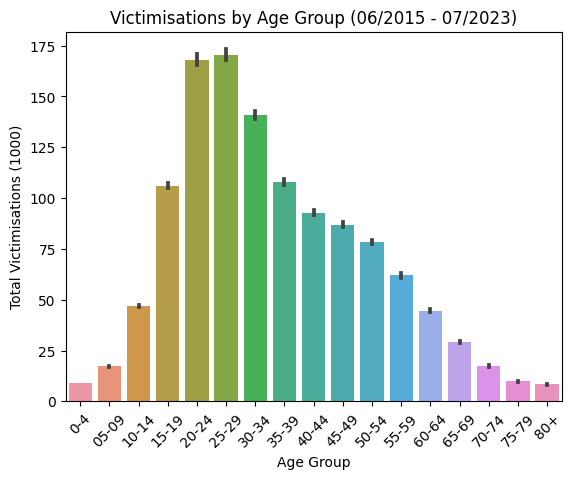

In [102]:
sns.barplot(data=df_age.sort_values(by='Age Group'), x='Age Group', y=df_age['Victimisations']/1000, estimator=sum)
plt.xticks(rotation=45)
plt.title('Victimisations by Age Group (06/2015 - 07/2023)')
plt.ylabel('Total Victimisations (1000)')
plt.show()

### Plot change in victimisations by crime type 

/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

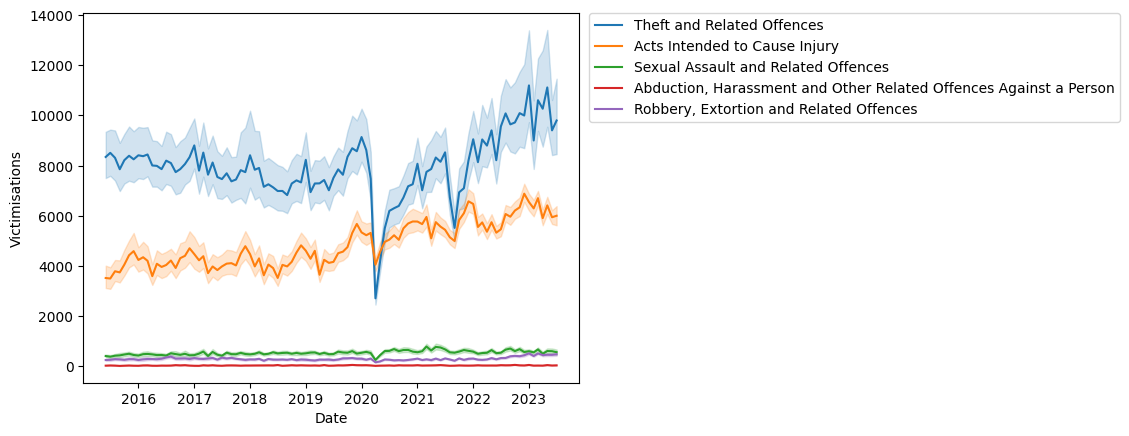

In [113]:
sns.lineplot(x='Date', y='Victimisations', hue='Crime Type', data=df_demographic, estimator=sum)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### Plot overall change in victimisations

/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/sv/fsgb7l150nx1b3vvpn5vnmd00000gn/T/ipykernel_4970/4077890203.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=df_demographic['Date'], y=df_demographic['Victimisations'], estimator=sum, palette='mako')
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conve

<Axes: xlabel='Date', ylabel='Victimisations'>

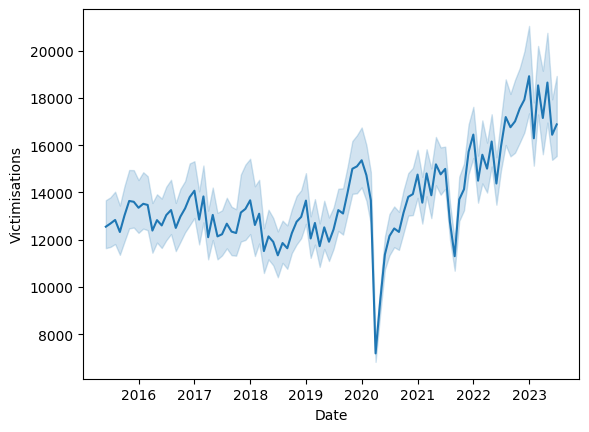

In [111]:
sns.lineplot(x=df_demographic['Date'], y=df_demographic['Victimisations'], estimator=sum, palette='mako')